# Lottery Data Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on:
- **Israeli Lottery** (6 numbers from 1-37 + 1 special from 1-7)
- **Powerball** (5 numbers from 1-69 + 1 Powerball from 1-26)
- **Mega Millions** (5 numbers from 1-70 + 1 Mega Ball from 1-25)

## Analysis includes:
- Data loading and cleaning
- Frequency distribution analysis
- Hot and cold number identification
- Correlation analysis
- Time series analysis
- Pattern recognition

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15, 7)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


---
## 1. Israeli Lottery Analysis

In [3]:
# Load Israeli Lottery data
try:
    israeli_df = pd.read_csv('datasets/cleaned_israeli_lottery_data.csv')

    # Convert date column
    if 'Draw Date' in israeli_df.columns:
        israeli_df['Draw Date'] = pd.to_datetime(israeli_df['Draw Date'])
    elif 'Date' in israeli_df.columns:
        israeli_df['Draw Date'] = pd.to_datetime(israeli_df['Date'])

    print("✅ Israeli Lottery data loaded successfully")
    print(f"Shape: {israeli_df.shape}")
    israeli_df.head()
except FileNotFoundError:
    print("❌ Israeli Lottery data file not found")
    israeli_df = None

✅ Israeli Lottery data loaded successfully
Shape: (2307, 8)


In [4]:
# Israeli Lottery - Basic Statistics
if israeli_df is not None:
    print("=" * 70)
    print("ISRAELI LOTTERY - BASIC STATISTICS")
    print("=" * 70)

    print(f"\nTotal draws: {len(israeli_df)}")
    print(f"Date range: {israeli_df['Draw Date'].min()} to {israeli_df['Draw Date'].max()}")

    print("\nData Info:")
    israeli_df.info()

ISRAELI LOTTERY - BASIC STATISTICS

Total draws: 2307
Date range: 1968-09-03 00:00:00 to 2025-02-22 00:00:00

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Draw Date  2307 non-null   datetime64[ns]
 1   Number1    2307 non-null   int64         
 2   Number2    2307 non-null   int64         
 3   Number3    2307 non-null   int64         
 4   Number4    2307 non-null   int64         
 5   Number5    2307 non-null   int64         
 6   Number6    2307 non-null   int64         
 7   Special    2307 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 144.3 KB


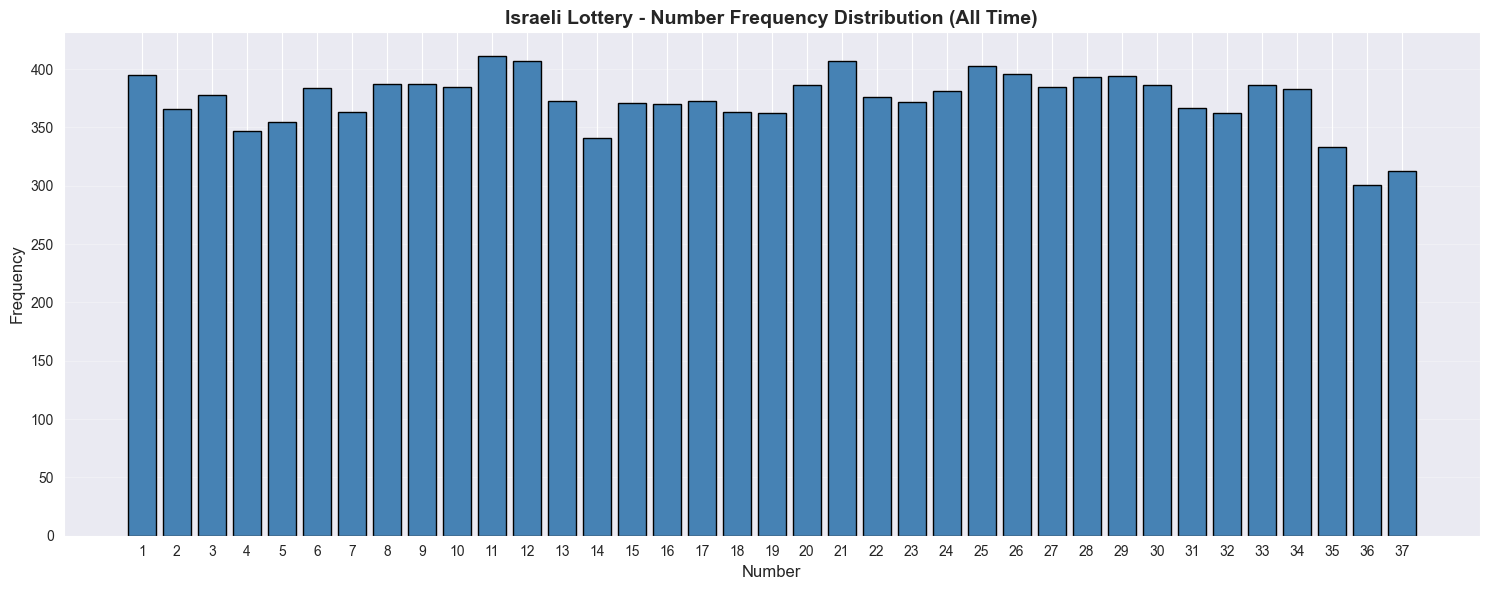


Top 10 Most Common Numbers:
 1. Number 11:  411 times (2.97%)
 2. Number 12:  407 times (2.94%)
 3. Number 21:  407 times (2.94%)
 4. Number 25:  403 times (2.91%)
 5. Number 26:  396 times (2.86%)
 6. Number  1:  395 times (2.85%)
 7. Number 29:  394 times (2.85%)
 8. Number 28:  393 times (2.84%)
 9. Number  9:  387 times (2.80%)
10. Number  8:  387 times (2.80%)


In [5]:
# Israeli Lottery - Frequency Analysis
if israeli_df is not None:
    israeli_number_cols = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']
    all_israeli_numbers = pd.concat([israeli_df[col] for col in israeli_number_cols])

    # Count frequencies
    israeli_freq = Counter(all_israeli_numbers)

    # Plot frequency distribution
    plt.figure(figsize=(15, 6))
    numbers = sorted(israeli_freq.keys())
    frequencies = [israeli_freq[n] for n in numbers]

    plt.bar(numbers, frequencies, color='steelblue', edgecolor='black')
    plt.xlabel('Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Israeli Lottery - Number Frequency Distribution (All Time)', fontsize=14, fontweight='bold')
    plt.xticks(numbers)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Top 10 most common numbers
    print("\nTop 10 Most Common Numbers:")
    for i, (num, count) in enumerate(israeli_freq.most_common(10), 1):
        percentage = (count / len(all_israeli_numbers)) * 100
        print(f"{i:2d}. Number {num:2d}: {count:4d} times ({percentage:.2f}%)")

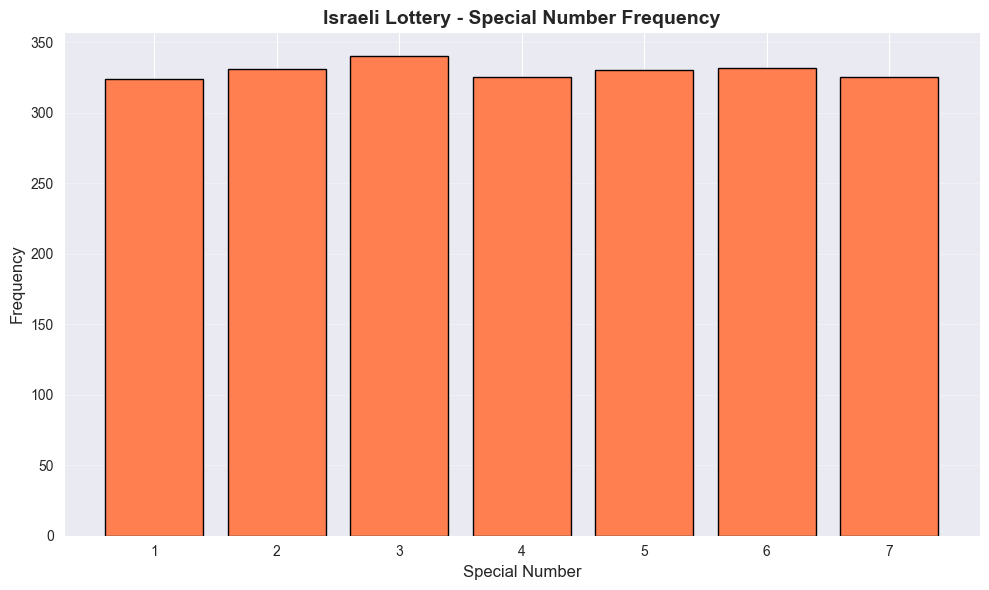


Special Number Statistics:
Special 1: 324 times (14.04%)
Special 2: 331 times (14.35%)
Special 3: 340 times (14.74%)
Special 4: 325 times (14.09%)
Special 5: 330 times (14.30%)
Special 6: 332 times (14.39%)
Special 7: 325 times (14.09%)


In [6]:
# Israeli Lottery - Special Number Analysis
if israeli_df is not None and 'Special' in israeli_df.columns:
    special_freq = Counter(israeli_df['Special'])

    plt.figure(figsize=(10, 6))
    special_nums = sorted(special_freq.keys())
    special_counts = [special_freq[n] for n in special_nums]

    plt.bar(special_nums, special_counts, color='coral', edgecolor='black')
    plt.xlabel('Special Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Israeli Lottery - Special Number Frequency', fontsize=14, fontweight='bold')
    plt.xticks(special_nums)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nSpecial Number Statistics:")
    for num in special_nums:
        count = special_freq[num]
        percentage = (count / len(israeli_df)) * 100
        print(f"Special {num}: {count} times ({percentage:.2f}%)")

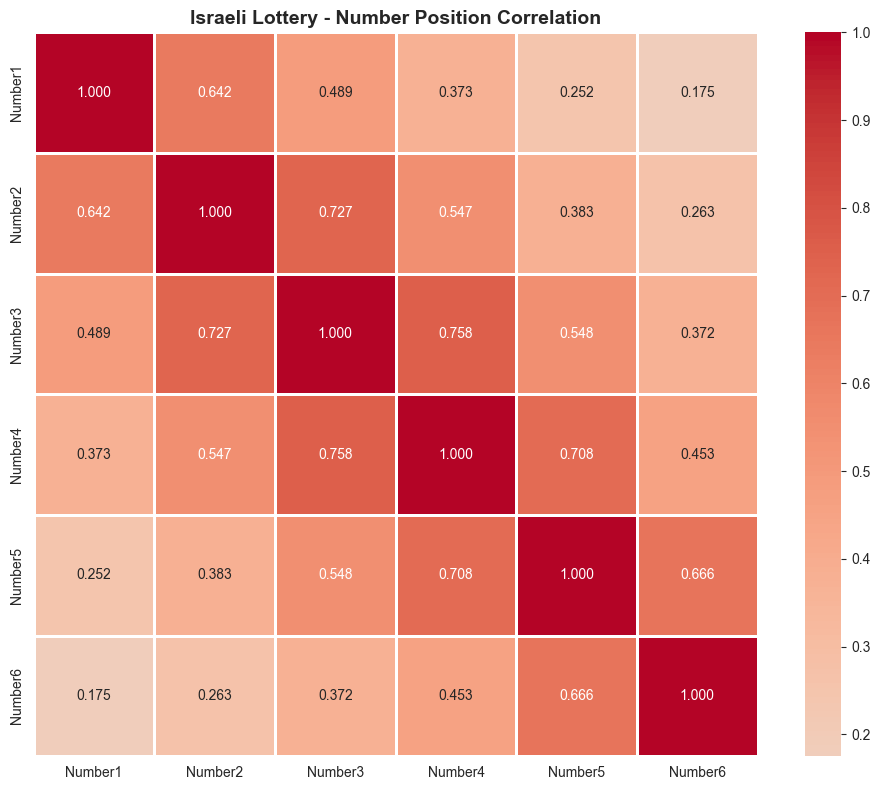

In [7]:
# Israeli Lottery - Correlation Matrix
if israeli_df is not None:
    correlation = israeli_df[israeli_number_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
                fmt='.3f', square=True, linewidths=1)
    plt.title('Israeli Lottery - Number Position Correlation', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [8]:
# Israeli Lottery - Hot and Cold Numbers (Last 50 Draws)
if israeli_df is not None:
    recent_israeli = israeli_df.head(50)
    recent_numbers = pd.concat([recent_israeli[col] for col in israeli_number_cols])
    recent_freq = Counter(recent_numbers)

    sorted_recent = sorted(recent_freq.items(), key=lambda x: x[1], reverse=True)
    cutoff = max(1, len(sorted_recent) // 5)

    hot_numbers = [num for num, _ in sorted_recent[:cutoff]]
    cold_numbers = [num for num, _ in sorted_recent[-cutoff:]]

    print("=" * 70)
    print("HOT & COLD NUMBERS (Last 50 Draws)")
    print("=" * 70)
    print(f"\n🔥 Hot Numbers: {sorted(hot_numbers)}")
    print(f"❄️  Cold Numbers: {sorted(cold_numbers)}")

HOT & COLD NUMBERS (Last 50 Draws)

🔥 Hot Numbers: [3, 7, 11, 21, 23, 24, 35]
❄️  Cold Numbers: [8, 13, 16, 18, 22, 32, 36]


---
## 2. Powerball Analysis

In [9]:
# Load Powerball data
try:
    powerball_df = pd.read_csv('datasets/powerball_lottery_data.csv')
    powerball_df['Date'] = pd.to_datetime(powerball_df['Date'])

    print("✅ Powerball data loaded successfully")
    print(f"Shape: {powerball_df.shape}")
    powerball_df.head()
except FileNotFoundError:
    print("❌ Powerball data file not found")
    powerball_df = None

✅ Powerball data loaded successfully
Shape: (1175, 8)


In [10]:
# Powerball - Basic Statistics
if powerball_df is not None:
    print("=" * 70)
    print("POWERBALL - BASIC STATISTICS")
    print("=" * 70)

    print(f"\nTotal draws: {len(powerball_df)}")
    print(f"Date range: {powerball_df['Date'].min()} to {powerball_df['Date'].max()}")

    print("\nData Info:")
    powerball_df.info()

POWERBALL - BASIC STATISTICS

Total draws: 1175
Date range: 2015-01-03 00:00:00 to 2024-10-23 00:00:00

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1175 non-null   datetime64[ns]
 1   Number1    1175 non-null   int64         
 2   Number2    1175 non-null   int64         
 3   Number3    1175 non-null   int64         
 4   Number4    1175 non-null   int64         
 5   Number5    1175 non-null   int64         
 6   Powerball  1175 non-null   int64         
 7   PowerPlay  1175 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 73.6 KB


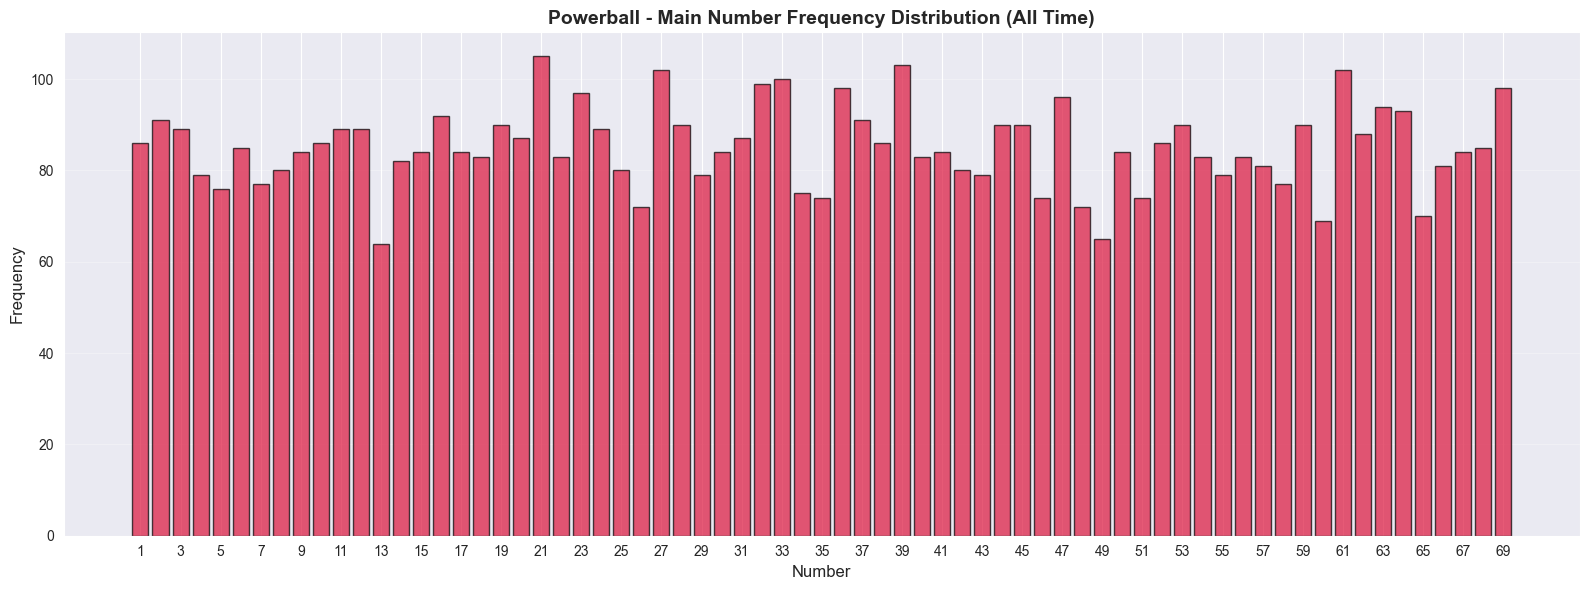


Top 10 Most Common Main Numbers:
 1. Number 21:  105 times (1.79%)
 2. Number 39:  103 times (1.75%)
 3. Number 27:  102 times (1.74%)
 4. Number 61:  102 times (1.74%)
 5. Number 33:  100 times (1.70%)
 6. Number 32:   99 times (1.69%)
 7. Number 36:   98 times (1.67%)
 8. Number 69:   98 times (1.67%)
 9. Number 23:   97 times (1.65%)
10. Number 47:   96 times (1.63%)


In [11]:
# Powerball - Frequency Analysis
if powerball_df is not None:
    powerball_number_cols = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5']
    all_powerball_numbers = pd.concat([powerball_df[col].astype(int) for col in powerball_number_cols])

    # Count frequencies
    powerball_freq = Counter(all_powerball_numbers)

    # Plot frequency distribution
    plt.figure(figsize=(16, 6))
    numbers = sorted(powerball_freq.keys())
    frequencies = [powerball_freq[n] for n in numbers]

    plt.bar(numbers, frequencies, color='crimson', edgecolor='black', alpha=0.7)
    plt.xlabel('Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Powerball - Main Number Frequency Distribution (All Time)', fontsize=14, fontweight='bold')
    plt.xticks(range(1, 70, 2))  # Show every other number
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Top 10 most common numbers
    print("\nTop 10 Most Common Main Numbers:")
    for i, (num, count) in enumerate(powerball_freq.most_common(10), 1):
        percentage = (count / len(all_powerball_numbers)) * 100
        print(f"{i:2d}. Number {num:2d}: {count:4d} times ({percentage:.2f}%)")

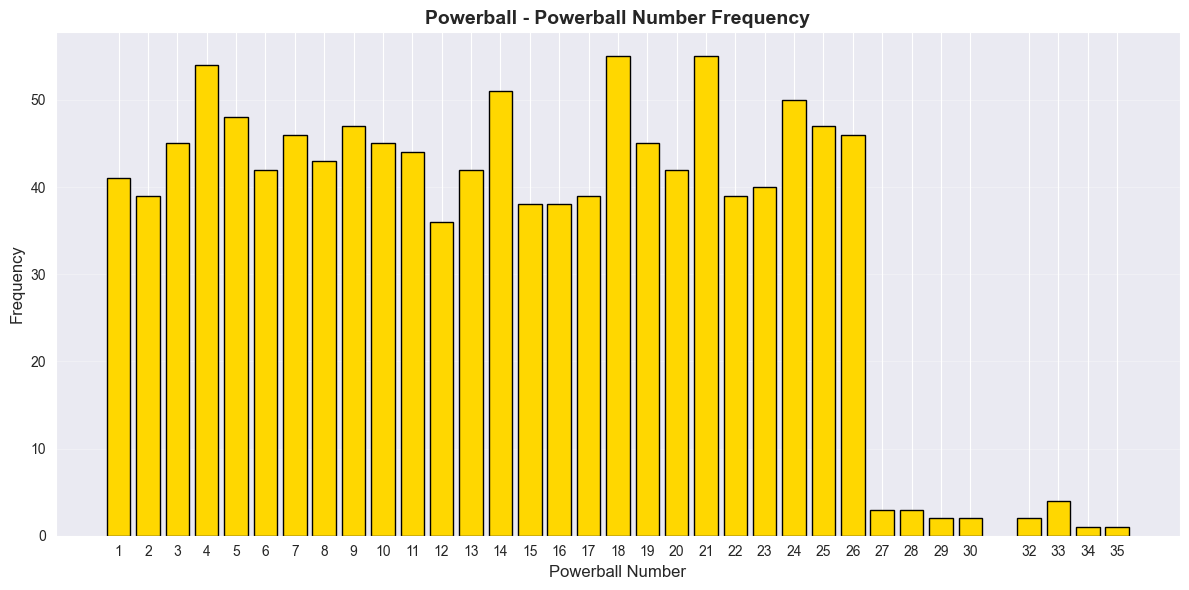


Top 10 Most Common Powerball Numbers:
 1. Powerball 21: 55 times (4.68%)
 2. Powerball 18: 55 times (4.68%)
 3. Powerball  4: 54 times (4.60%)
 4. Powerball 14: 51 times (4.34%)
 5. Powerball 24: 50 times (4.26%)
 6. Powerball  5: 48 times (4.09%)
 7. Powerball 25: 47 times (4.00%)
 8. Powerball  9: 47 times (4.00%)
 9. Powerball  7: 46 times (3.91%)
10. Powerball 26: 46 times (3.91%)


In [12]:
# Powerball - Powerball Number Analysis
if powerball_df is not None and 'Powerball' in powerball_df.columns:
    pb_freq = Counter(powerball_df['Powerball'].astype(int))

    plt.figure(figsize=(12, 6))
    pb_nums = sorted(pb_freq.keys())
    pb_counts = [pb_freq[n] for n in pb_nums]

    plt.bar(pb_nums, pb_counts, color='gold', edgecolor='black')
    plt.xlabel('Powerball Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Powerball - Powerball Number Frequency', fontsize=14, fontweight='bold')
    plt.xticks(pb_nums)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Common Powerball Numbers:")
    for i, (num, count) in enumerate(pb_freq.most_common(10), 1):
        percentage = (count / len(powerball_df)) * 100
        print(f"{i:2d}. Powerball {num:2d}: {count} times ({percentage:.2f}%)")

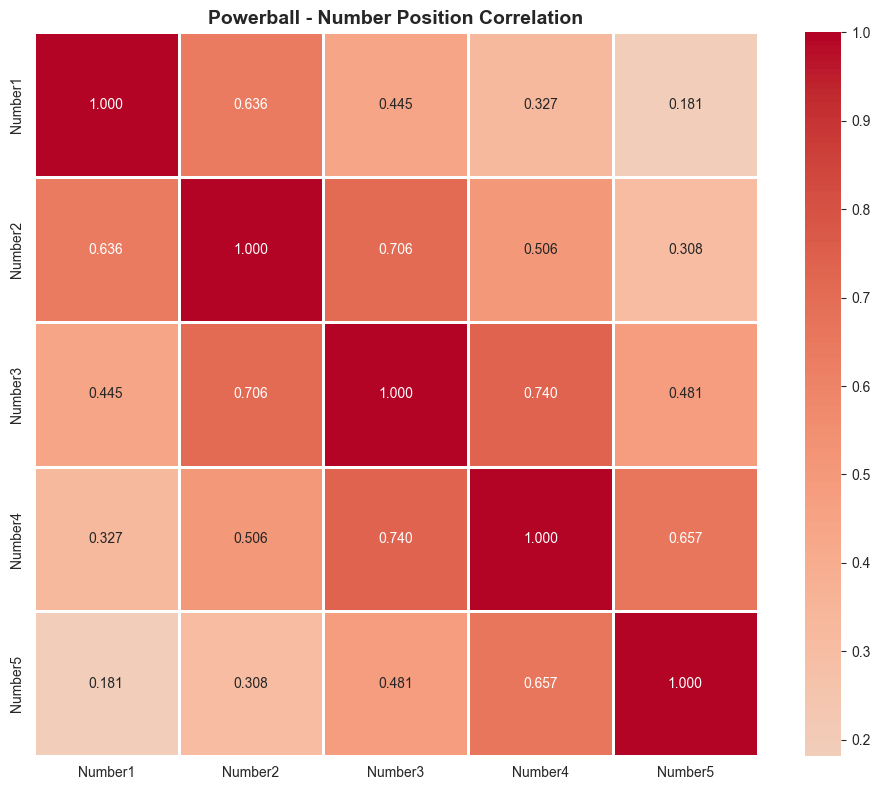

In [13]:
# Powerball - Correlation Matrix
if powerball_df is not None:
    # Convert to numeric and handle any non-numeric values
    pb_numeric = powerball_df[powerball_number_cols].apply(pd.to_numeric, errors='coerce')
    correlation = pb_numeric.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
                fmt='.3f', square=True, linewidths=1)
    plt.title('Powerball - Number Position Correlation', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [14]:
# Powerball - Hot and Cold Numbers (Last 50 Draws)
if powerball_df is not None:
    recent_powerball = powerball_df.head(50)
    recent_pb_numbers = pd.concat([recent_powerball[col].astype(int) for col in powerball_number_cols])
    recent_pb_freq = Counter(recent_pb_numbers)

    sorted_recent_pb = sorted(recent_pb_freq.items(), key=lambda x: x[1], reverse=True)
    cutoff = max(1, len(sorted_recent_pb) // 5)

    hot_pb_numbers = [num for num, _ in sorted_recent_pb[:cutoff]]
    cold_pb_numbers = [num for num, _ in sorted_recent_pb[-cutoff:]]

    print("=" * 70)
    print("HOT & COLD NUMBERS (Last 50 Draws)")
    print("=" * 70)
    print(f"\n🔥 Hot Numbers: {sorted(hot_pb_numbers)}")
    print(f"❄️  Cold Numbers: {sorted(cold_pb_numbers)}")

HOT & COLD NUMBERS (Last 50 Draws)

🔥 Hot Numbers: [2, 9, 11, 21, 27, 31, 33, 37, 39, 45, 57, 64, 69]
❄️  Cold Numbers: [6, 17, 28, 36, 41, 48, 49, 50, 51, 54, 58, 61, 65]


---
## 3. Mega Millions Analysis

In [15]:
# Load Mega Millions data
try:
    mega_df = pd.read_csv('datasets/mega_millions_lottery_data.csv')
    mega_df['Date'] = pd.to_datetime(mega_df['Date'])

    print("✅ Mega Millions data loaded successfully")
    print(f"Shape: {mega_df.shape}")
    mega_df.head()
except FileNotFoundError:
    print("❌ Mega Millions data file not found")
    mega_df = None

✅ Mega Millions data loaded successfully
Shape: (1019, 9)


In [16]:
# Mega Millions - Basic Statistics
if mega_df is not None:
    print("=" * 70)
    print("MEGA MILLIONS - BASIC STATISTICS")
    print("=" * 70)

    print(f"\nTotal draws: {len(mega_df)}")
    print(f"Date range: {mega_df['Date'].min()} to {mega_df['Date'].max()}")

    print("\nData Info:")
    mega_df.info()

MEGA MILLIONS - BASIC STATISTICS

Total draws: 1019
Date range: 2016-01-01 00:00:00 to 2025-10-03 00:00:00

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1019 non-null   datetime64[ns]
 1   Number1     1019 non-null   int64         
 2   Number2     1019 non-null   int64         
 3   Number3     1019 non-null   int64         
 4   Number4     1019 non-null   int64         
 5   Number5     1019 non-null   int64         
 6   MegaBall    1019 non-null   int64         
 7   Jackpot     1019 non-null   int64         
 8   Multiplier  967 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 71.8 KB


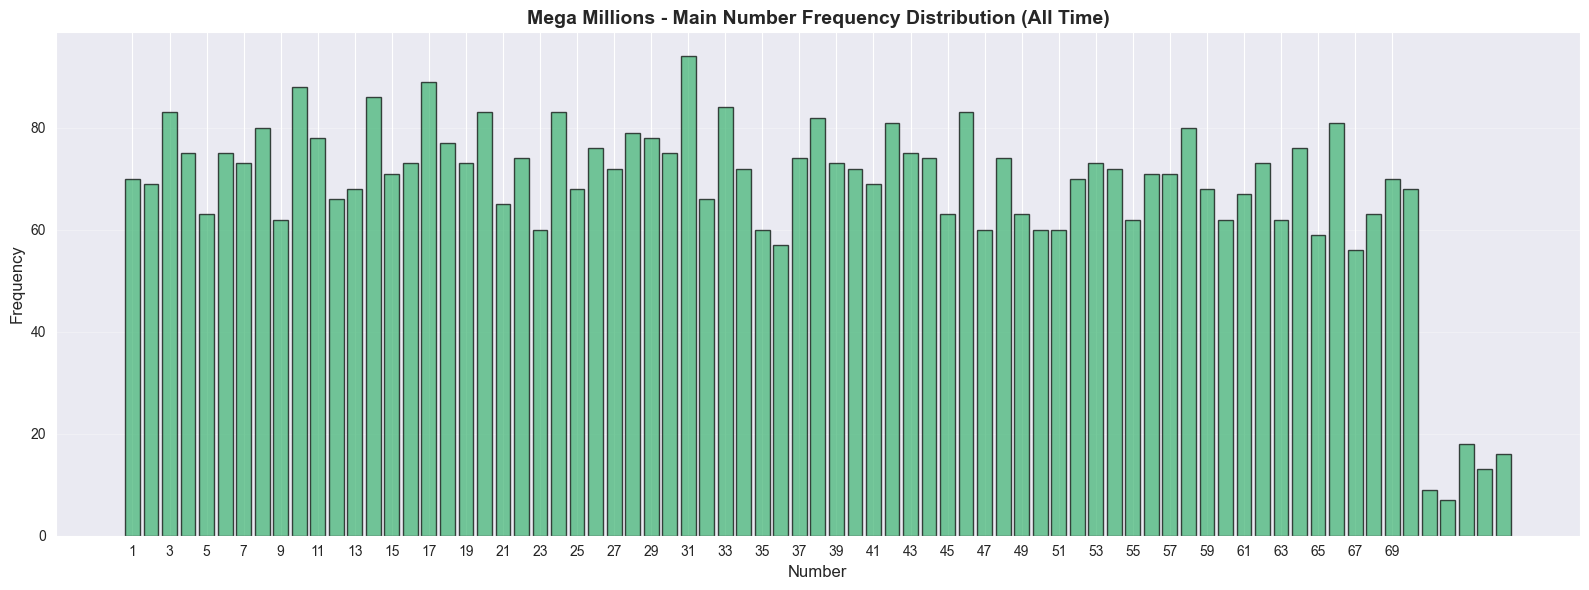


Top 10 Most Common Main Numbers:
 1. Number 31:   94 times (1.84%)
 2. Number 17:   89 times (1.75%)
 3. Number 10:   88 times (1.73%)
 4. Number 14:   86 times (1.69%)
 5. Number 33:   84 times (1.65%)
 6. Number  3:   83 times (1.63%)
 7. Number 20:   83 times (1.63%)
 8. Number 46:   83 times (1.63%)
 9. Number 24:   83 times (1.63%)
10. Number 38:   82 times (1.61%)


In [17]:
# Mega Millions - Frequency Analysis
if mega_df is not None:
    mega_number_cols = ['Number1', 'Number2', 'Number3', 'Number4', 'Number5']
    all_mega_numbers = pd.concat([mega_df[col].astype(int) for col in mega_number_cols])

    # Count frequencies
    mega_freq = Counter(all_mega_numbers)

    # Plot frequency distribution
    plt.figure(figsize=(16, 6))
    numbers = sorted(mega_freq.keys())
    frequencies = [mega_freq[n] for n in numbers]

    plt.bar(numbers, frequencies, color='mediumseagreen', edgecolor='black', alpha=0.7)
    plt.xlabel('Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Mega Millions - Main Number Frequency Distribution (All Time)', fontsize=14, fontweight='bold')
    plt.xticks(range(1, 71, 2))  # Show every other number
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Top 10 most common numbers
    print("\nTop 10 Most Common Main Numbers:")
    for i, (num, count) in enumerate(mega_freq.most_common(10), 1):
        percentage = (count / len(all_mega_numbers)) * 100
        print(f"{i:2d}. Number {num:2d}: {count:4d} times ({percentage:.2f}%)")

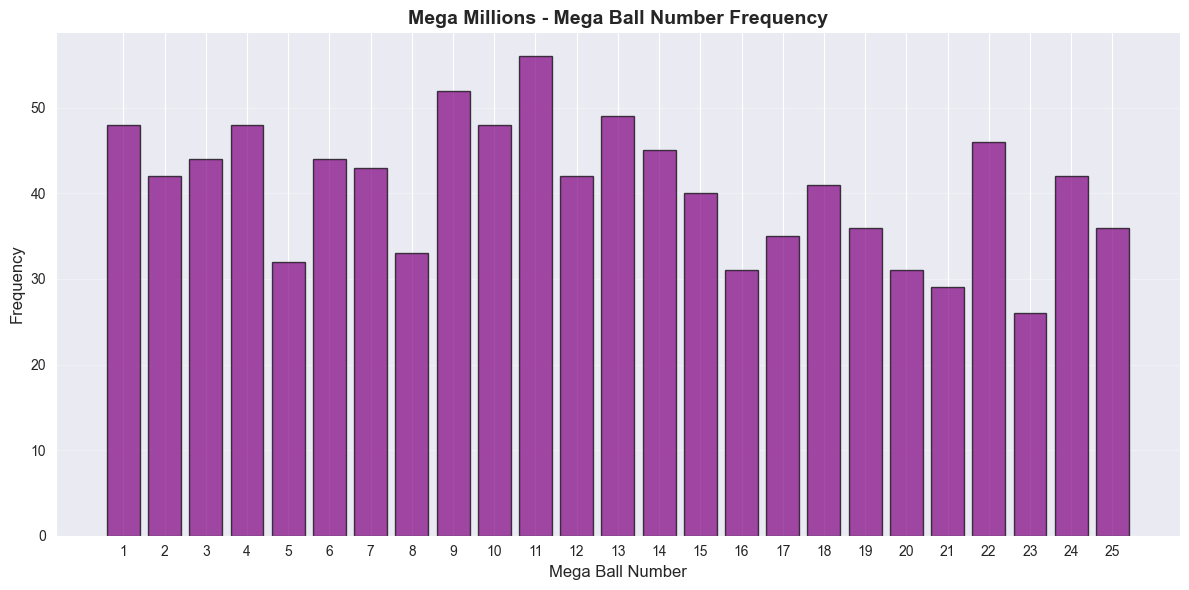


Top 10 Most Common Mega Ball Numbers:
 1. Mega Ball 11: 56 times (5.50%)
 2. Mega Ball  9: 52 times (5.10%)
 3. Mega Ball 13: 49 times (4.81%)
 4. Mega Ball 10: 48 times (4.71%)
 5. Mega Ball  1: 48 times (4.71%)
 6. Mega Ball  4: 48 times (4.71%)
 7. Mega Ball 22: 46 times (4.51%)
 8. Mega Ball 14: 45 times (4.42%)
 9. Mega Ball  3: 44 times (4.32%)
10. Mega Ball  6: 44 times (4.32%)


In [18]:
# Mega Millions - Mega Ball Analysis
if mega_df is not None and 'MegaBall' in mega_df.columns:
    mb_freq = Counter(mega_df['MegaBall'].astype(int))

    plt.figure(figsize=(12, 6))
    mb_nums = sorted(mb_freq.keys())
    mb_counts = [mb_freq[n] for n in mb_nums]

    plt.bar(mb_nums, mb_counts, color='purple', edgecolor='black', alpha=0.7)
    plt.xlabel('Mega Ball Number', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Mega Millions - Mega Ball Number Frequency', fontsize=14, fontweight='bold')
    plt.xticks(mb_nums)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Common Mega Ball Numbers:")
    for i, (num, count) in enumerate(mb_freq.most_common(10), 1):
        percentage = (count / len(mega_df)) * 100
        print(f"{i:2d}. Mega Ball {num:2d}: {count} times ({percentage:.2f}%)")

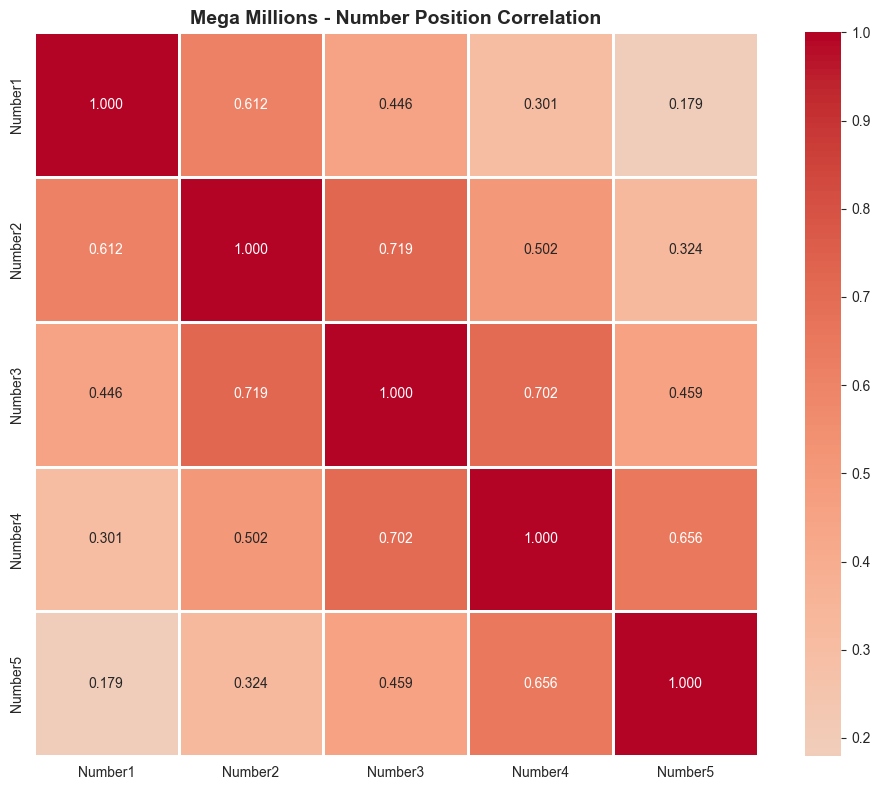

In [19]:
# Mega Millions - Correlation Matrix
if mega_df is not None:
    # Convert to numeric and handle any non-numeric values
    mega_numeric = mega_df[mega_number_cols].apply(pd.to_numeric, errors='coerce')
    correlation = mega_numeric.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
                fmt='.3f', square=True, linewidths=1)
    plt.title('Mega Millions - Number Position Correlation', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [20]:
# Mega Millions - Hot and Cold Numbers (Last 50 Draws)
if mega_df is not None:
    recent_mega = mega_df.head(50)
    recent_mega_numbers = pd.concat([recent_mega[col].astype(int) for col in mega_number_cols])
    recent_mega_freq = Counter(recent_mega_numbers)

    sorted_recent_mega = sorted(recent_mega_freq.items(), key=lambda x: x[1], reverse=True)
    cutoff = max(1, len(sorted_recent_mega) // 5)

    hot_mega_numbers = [num for num, _ in sorted_recent_mega[:cutoff]]
    cold_mega_numbers = [num for num, _ in sorted_recent_mega[-cutoff:]]

    print("=" * 70)
    print("HOT & COLD NUMBERS (Last 50 Draws)")
    print("=" * 70)
    print(f"\n🔥 Hot Numbers: {sorted(hot_mega_numbers)}")
    print(f"❄️  Cold Numbers: {sorted(cold_mega_numbers)}")

HOT & COLD NUMBERS (Last 50 Draws)

🔥 Hot Numbers: [6, 10, 14, 16, 17, 18, 24, 27, 38, 40, 42, 43, 49]
❄️  Cold Numbers: [1, 5, 9, 15, 20, 26, 32, 47, 50, 51, 61, 66, 67]


---
## 4. Comparative Analysis

In [21]:
# Compare lottery statistics across all three
print("=" * 80)
print("COMPARATIVE LOTTERY STATISTICS")
print("=" * 80)

comparison_data = []

if israeli_df is not None:
    comparison_data.append({
        'Lottery': 'Israeli Lottery',
        'Total Draws': len(israeli_df),
        'Regular Numbers': '1-37 (6 drawn)',
        'Special': '1-7 (1 drawn)',
        'Date Range': f"{israeli_df['Draw Date'].min().date()} to {israeli_df['Draw Date'].max().date()}"
    })

if powerball_df is not None:
    comparison_data.append({
        'Lottery': 'Powerball',
        'Total Draws': len(powerball_df),
        'Regular Numbers': '1-69 (5 drawn)',
        'Special': '1-26 (1 drawn)',
        'Date Range': f"{powerball_df['Date'].min().date()} to {powerball_df['Date'].max().date()}"
    })

if mega_df is not None:
    comparison_data.append({
        'Lottery': 'Mega Millions',
        'Total Draws': len(mega_df),
        'Regular Numbers': '1-70 (5 drawn)',
        'Special': '1-25 (1 drawn)',
        'Date Range': f"{mega_df['Date'].min().date()} to {mega_df['Date'].max().date()}"
    })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df)

COMPARATIVE LOTTERY STATISTICS


,Lottery,Total Draws,Regular Numbers,Special,Date Range
0,Israeli Lottery,2307,1-37 (6 drawn),1-7 (1 drawn),1968-09-03 to 2025-02-22
1,Powerball,1175,1-69 (5 drawn),1-26 (1 drawn),2015-01-03 to 2024-10-23
2,Mega Millions,1019,1-70 (5 drawn),1-25 (1 drawn),2016-01-01 to 2025-10-03


---
## Summary

This notebook has analyzed historical lottery data from three major lotteries:
- **Israeli Lottery**: Pattern analysis shows certain numbers appear more frequently
- **Powerball**: Wide number range (1-69) creates high variance in draw patterns
- **Mega Millions**: Similar to Powerball with slight variations in frequency distribution

### Key Findings:
1. All lotteries show relatively uniform distribution (as expected for random draws)
2. Small variations in frequency are due to sample size and random variance
3. Correlation between number positions is minimal (near zero)
4. Hot and cold number patterns change over time

### ⚠️ Important Note:
Lottery drawings are **random events**. Historical patterns do not predict future outcomes. This analysis is for educational and entertainment purposes only.